## I Importing libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set()
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## II Importing and Inspecting Crime Dataset

In [2]:
#1 Importing 
df = pd.read_csv('BerlinCrime.csv')
df.head()
df.dtypes

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


Year               int64
District          object
Code               int64
Location          object
Robbery            int64
Street_robbery     int64
Injury             int64
Agg_assault        int64
Threat             int64
Theft              int64
Car                int64
From_car           int64
Bike               int64
Burglary           int64
Fire               int64
Arson              int64
Damage             int64
Graffiti           int64
Drugs              int64
Local              int64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

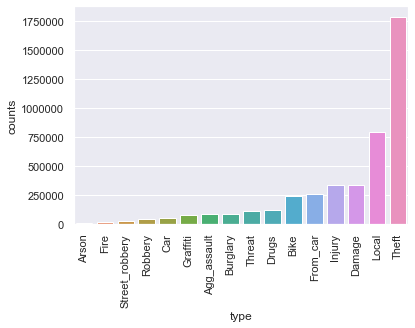

In [34]:
#2 visualisation of the overall count of different crime types

totalcrimes =df.drop(columns=['Year','District','Location','Code'])
allcrimes = totalcrimes.sum()
allcrimes1 = pd.DataFrame(allcrimes).reset_index()
allcrimes1.columns = ['type','counts']
allcrimes1 = allcrimes1.sort_values('counts')
sns.barplot(allcrimes1.type, allcrimes1.counts)
plt.xticks(rotation=90)

Theft by far the most common (and does not include car theft and bike theft). The second most common type of crime is 'local', meaning that the perpetrator commited a crime in their district. These categories, however, are not clearly defined, and it is unclear how crimes are sometimes categorized(e.g. how is a case in which the perpetrator robs a shop in his/her district with a weapon, harming the shopkeepers, and running away from the crime scene by a car). 

Given that Local and Theft make a larger portion of the total number of crimes than all other types do, they should be treated separately. 

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes
3,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019
11,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173
8,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582
9,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033
2,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785
7,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585
10,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459
6,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058
5,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786
0,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618


<BarContainer object of 12 artists>

[Text(0, 0, 'Marzahn-Hellersdorf'),
 Text(0, 0, 'Treptow-Köpenick'),
 Text(0, 0, 'Spandau'),
 Text(0, 0, 'Steglitz-Zehlendorf'),
 Text(0, 0, 'Lichtenberg'),
 Text(0, 0, 'Reinickendorf'),
 Text(0, 0, 'Tempelhof-Schöneberg'),
 Text(0, 0, 'Pankow'),
 Text(0, 0, 'Neukölln'),
 Text(0, 0, 'Charlottenburg-Wilmersdorf'),
 Text(0, 0, 'Friedrichshain-Kreuzberg'),
 Text(0, 0, 'Mitte')]

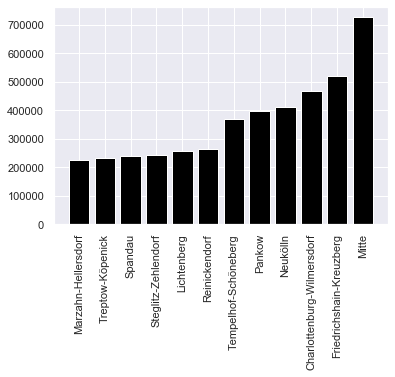

In [37]:
# 3 Counts of each crime in each district
district_overview  = df.groupby('District', as_index=False).sum()
district_overview.drop(['Year', 'Code'], axis=1, inplace=True)
district_overview= district_overview.reset_index(drop=True)

    #summing number of crimes per district and assigning it to a new column
district_overview['AllCrimes']= district_overview.sum(axis=1)
district_overview = district_overview.sort_values('AllCrimes')
district_overview

    #visualising crime count per district
fig, ax = plt.subplots()
ax.bar(district_overview['District'],
        district_overview['AllCrimes'],
        color='black')
ax.set_xticklabels(district_overview['District'], rotation=90)
plt.show()    

In [38]:
#4 Finding correlation between the count of crimes and the area of districts

    #Adding area information (obtained from Wiki)
Areas = [{'Charlottenburg-Wilmersdorf': '64.72','Friedrichshain-Kreuzberg':'20.16', 'Lichtenberg':'52.29',
          'Marzahn-Hellersdorf': '61.74','Mitte':'39.47','Neukölln':'44.93',
          'Pankow':'103.01','Reinickendorf':'89.46','Spandau':'91.91','Steglitz-Zehlendorf':'102.50',
          'Tempelhof-Schöneberg': '53.09', 'Treptow-Köpenick':'168.42'}]
Areasdf = pd.DataFrame(Areas)
Areasdf= Areasdf.T.reset_index()
Areasdf.columns = ['District','Area']
Areasdf
DO = pd.merge(district_overview, Areasdf, on='District')
DO

    # Establishing correlation between total number of offenses and the size of each district in square km.
DO.Area = DO.Area.astype(float)
round(DO['AllCrimes'].corr(DO['Area']),2)

,District,Area
0,Charlottenburg-Wilmersdorf,64.72
1,Friedrichshain-Kreuzberg,20.16
2,Lichtenberg,52.29
3,Marzahn-Hellersdorf,61.74
4,Mitte,39.47
5,Neukölln,44.93
6,Pankow,103.01
7,Reinickendorf,89.46
8,Spandau,91.91
9,Steglitz-Zehlendorf,102.50


,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes,Area
0,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019,61.74
1,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173,168.42
2,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582,91.91
3,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033,102.50
4,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785,52.29
5,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585,89.46
6,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459,53.09
7,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058,103.01
8,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786,44.93
9,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618,64.72


-0.57

It is a moderate negative correlation (r= -0.57), which means that the area of the district does to some extend affect the number of crimes. That is, larger areas tend to have less crime, could  be interpreted as a consequence of their geographical layout and population density. Whilst central areas like Mitte and Friedrichschein-Kreuzberg are very densely populated, areas like Treptow-Köpenick or Spandau have lot of green spaces, lakes, etc.  


Text(0.5, 0, 'District')

Text(0, 0.5, 'Total number of crimes')

Text(0.5, 1.0, 'Scatter plot of crimes and area of each district')

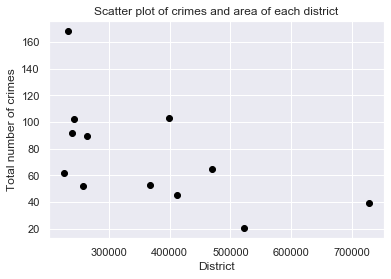

In [39]:
    # Visualising the relationship of crimes and district sizes
x = DO['AllCrimes']
y = DO['Area']
plt.scatter(x,y, color = 'black')
plt.xlabel('District')
plt.ylabel('Total number of crimes')
plt.title("Scatter plot of crimes and area of each district")

## III Importing and Inspecting Population Dataset and its Correlation to the Crime Data

In [40]:
#1 importing and inspecting data
population = pd.read_excel('BerlinPopulationFinal.xlsx')
population.columns = ['Citizenship','Year','Sex','Age','District','Population']

    #checking datatypes
population.dtypes

    #dropping unnecessary columns at this point in order to group data based on year and district
population_overview = population.drop(columns = ['Age','Sex','Citizenship'])
population_overview = population_overview.groupby(['Year', 'District'], as_index=False).agg({"Population": "sum"})
population_overview.Population  = population_overview.Population.astype(int)
population_overview.head()

    # grouping the crime dataset based on year and district
dfgroup = df.groupby(['Year', 'District'], as_index=False).sum()

    #dropping district code so that crimes can be summarized in a new column
dfgroup = dfgroup.drop(columns = ['Code'])

    # putting year as an index so that the crimes can be summed. 
dfgroup = dfgroup.reset_index().set_index('Year')

    #dropping index column
dfgroup = dfgroup.drop(columns = ['index'])

    # assigning a total column 
dfgroup['AllCrimes']= dfgroup.sum(axis=1)

    #putting back year as a column
dfgroup.reset_index(level=0, inplace=True)
dfgroup.head()

    # merging crime list with population overview, in order to establish if the size of the population can be correlated to the number of crimes.
popcrimes = pd.merge(dfgroup, population_overview, on=['District', 'Year'],how='inner')
popcrimes.head()

#2 checking correlation of number of crimes with the size of population in each year and each district
round(popcrimes['AllCrimes'].corr(popcrimes['Population']),2)

Citizenship     object
Year             int64
Sex             object
Age             object
District        object
Population     float64
dtype: object

,Year,District,Population
0,2012,Berlin,3469621
1,2012,Charlottenburg-Wilmersdorf,319289
2,2012,Friedrichshain-Kreuzberg,269471
3,2012,Lichtenberg,260505
4,2012,Marzahn-Hellersdorf,251879


,Year,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes
0,2012,Charlottenburg-Wilmersdorf,643,248,4224,1195,1427,24061,707,3770,3173,1544,133,45,3975,847,1064,9997,57053
1,2012,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,3285,1214,314,105,5499,1311,1853,11001,57969
2,2012,Lichtenberg,260,112,2570,586,789,11911,445,1979,1418,632,187,67,3355,896,335,6252,31794
3,2012,Marzahn-Hellersdorf,331,148,3052,625,929,9714,451,1778,1075,457,242,77,3435,800,308,6202,29624
4,2012,Mitte,1253,610,7921,2362,2242,36486,620,4317,3358,1695,354,140,6180,1346,2849,16545,88278


,Year,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes,Population
0,2012,Charlottenburg-Wilmersdorf,643,248,4224,1195,1427,24061,707,3770,3173,1544,133,45,3975,847,1064,9997,57053,319289
1,2012,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,3285,1214,314,105,5499,1311,1853,11001,57969,269471
2,2012,Lichtenberg,260,112,2570,586,789,11911,445,1979,1418,632,187,67,3355,896,335,6252,31794,260505
3,2012,Marzahn-Hellersdorf,331,148,3052,625,929,9714,451,1778,1075,457,242,77,3435,800,308,6202,29624,251879
4,2012,Mitte,1253,610,7921,2362,2242,36486,620,4317,3358,1695,354,140,6180,1346,2849,16545,88278,339974


0.63

There is  a moderate positive (r= 0.63) correlation between the two, but it is a stronger correlation than the number of crimes and the area of districts.

<Figure size 864x576 with 0 Axes>

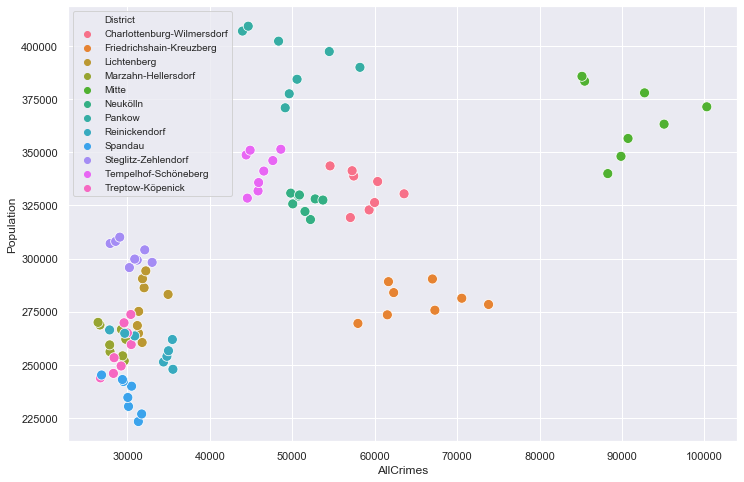

In [8]:
    # Visualisation of the relationship between number of crimes and population size/per year and their distinction by district.

plt.figure(figsize=(12,8))
sns.scatterplot(x = popcrimes['AllCrimes'], y = popcrimes['Population'],hue=popcrimes['District'], s=100 )
plt.legend(fontsize=10, title_fontsize=11)

Certain districts display no straightforward relationship. This is likely to be either the consequence of only certain crime types being related to the population size, or the reason of particular parts of districts having higher crime rates than others. 

In [9]:
    #Checking correlations between crime types, their counts and population. 

popcors = pd.DataFrame(popcrimes.corr()['Population'])
popcors.sort_values('Population')

,Population
Year,0.179076
Drugs,0.259812
Street_robbery,0.319215
Robbery,0.352857
Fire,0.358736
Arson,0.380057
Agg_assault,0.389814
Injury,0.443636
Car,0.476676
Threat,0.527240


As shown above, correlations with population vary by crime category.They are mostly moderately correlated, and the only strong correlation that exists in the dataset is the number of bike thefts with the population size. Although only a moderate correlation has been established between number of crimes and population size, given that this correlation is stronger than the correlation between the area of district and crime counts, we will standarize the data by the 'frequency' of crimes. That is, number of crimes per 100 000 people. 

## IV Importing and Inspecting Population Dataset and its Correlation to the Crime Data

In [10]:
#1 importing the frequency dataset (Crime counts standardized by the population size)
crime_freq = pd.read_excel('BerlinCrime_frequency.xlsx')
crime_freq.head()

#2 importing the  frequency table that was rearranged in excel #TRY TO DO IT IN PANDAS
cfreq = pd.read_excel('Berlincrime_frequency_rearranged.xlsx')
pd.set_option('display.max_rows', 100)
cfreq = pd.DataFrame(cfreq)
cfreq.columns

    #renaming the crime_hood\t back to local
cfreq = cfreq.replace('crime_hood\t','local')
    # checking types
cfreq.dtypes
cfreq.head()

#2 Getting rid of obvious outliers (very high frequencies) #FINISH THIS
cfreqout = cfreq.sort_values(['frequency'], ascending=False)
len(cfreqout)
cfreqout.head(10)

outliers = []
data = cfreqout['frequency']
def find_outliers(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
    return outliers

outliers = pd.DataFrame(find_outliers(data))
outliers.columns = ['outliers']
outliers.head()

    # merging this with the cfreqout, and getting rid of the outliers
cfreqout_wo_outliers = pd.merge(cfreqout, outliers, left_on='frequency', right_on='outliers', how = 'outer')
    
    # getting rid of the outliers
cfreqout_wo_outliers1= cfreqout_wo_outliers[cfreqout_wo_outliers['outliers'].isnull()]
cfreqout_wo_outliers1= cfreqout_wo_outliers1.drop(columns = ['outliers'])

,year,hood_id,neighborhood,district,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,crime_hood\t
0,2012,10111,Tiergarten Süd,Mitte,556,365,4651,1540,937,17960,143,2603,952,540,127,32,2167,206,1357,8190
1,2012,10112,Regierungsviertel,Mitte,709,316,5171,1342,1549,34941,109,3349,1854,404,109,44,4145,1353,1069,9491
2,2012,10113,Alexanderplatz,Mitte,513,288,3265,962,644,19045,172,1678,1742,583,104,57,3259,1106,922,6586
3,2012,10114,Brunnenstraße Süd,Mitte,203,98,993,235,258,7494,336,751,1549,512,55,20,1674,477,833,2941
4,2012,10221,Moabit West,Mitte,310,122,1502,442,475,5897,224,979,776,384,100,53,1232,153,618,3349


Index(['year', 'hood_id', 'neighborhood', 'district', 'type', 'frequency'], dtype='object')

year             int64
hood_id          int64
neighborhood    object
district        object
type            object
frequency        int64
dtype: object

,year,hood_id,neighborhood,district,type,frequency
0,2012,10111,Tiergarten Süd,Mitte,robbery,556
1,2012,10112,Regierungsviertel,Mitte,robbery,709
2,2012,10113,Alexanderplatz,Mitte,robbery,513
3,2012,10114,Brunnenstraße Süd,Mitte,robbery,203
4,2012,10221,Moabit West,Mitte,robbery,310


17664

,year,hood_id,neighborhood,district,type,frequency
5570,2012,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,125333
5708,2013,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,95775
6122,2016,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,86957
7778,2012,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft_from_car,74667
17576,2019,40617,Forst Grunewald,CharlottenburgWilmersdorf,local,65672
5846,2014,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,58904
6073,2016,10112,Regierungsviertel,Mitte,theft,54452
6536,2019,40617,Forst Grunewald,CharlottenburgWilmersdorf,theft,53731
5935,2015,10112,Regierungsviertel,Mitte,theft,53276
17438,2018,40617,Forst Grunewald,CharlottenburgWilmersdorf,local,50000


-7419.650015507527


,outliers
0,125333
1,95775
2,86957
3,74667
4,65672


In [11]:
#3 top 20 most notorious neighbourhoods (based on the mean of frequency....)

neigh = cfreqout_wo_outliers1['neighborhood'].unique()
neigh=pd.DataFrame(neigh)
neigh.head()
neigh.columns = ['neighborhood']
neigh.head(30)
len(neigh)
selfreqout = cfreqout_wo_outliers1[['neighborhood','district','frequency']]
neigh = pd.merge(neigh, selfreqout, on='neighborhood', how='inner')
neigh = neigh.groupby(['neighborhood','district']).agg({'frequency':'mean'}).reset_index()
neigh.head(20)



,0
0,AltTreptow
1,Niederschöneweide
2,Prenzlauer Berg Nordwest
3,südliche Luisenstadt
4,Halensee


,neighborhood
0,AltTreptow
1,Niederschöneweide
2,Prenzlauer Berg Nordwest
3,südliche Luisenstadt
4,Halensee
5,Regierungsviertel
6,Tempelhofer Vorstadt
7,Frankfurter Allee Süd FK
8,Prenzlauer Berg Ost
9,OttoSuhrAllee


138

,neighborhood,district,frequency
0,Adlershof,TreptowKöpenick,875.429688
1,Albrechtstr.,SteglitzZehlendorf,491.703125
2,Alexanderplatz,Mitte,1281.525000
3,AllendeViertel,TreptowKöpenick,501.382812
4,AltHohenschönhausen Nord,Lichtenberg,793.312500
5,AltHohenschönhausen Süd,Lichtenberg,656.375000
6,AltLichtenberg,Lichtenberg,1146.984375
7,AltTreptow,TreptowKöpenick,961.966942
8,Altglienicke,TreptowKöpenick,455.000000
9,AltstadtKietz,TreptowKöpenick,709.804688


In [12]:
#4 Checking correlations between crime types, their counts and population based on parts of districts. 


In [13]:
#5 Checking the distribution of the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

[(0, 5000)]

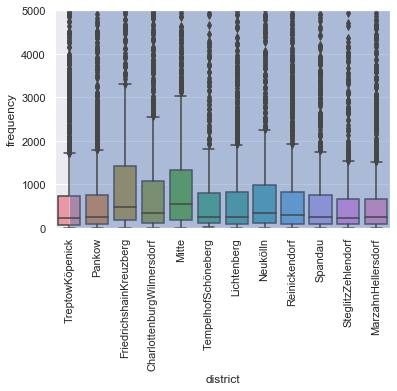

In [14]:
sns.distplot(cfreqout_wo_outliers1['frequency'], kde=False)

a = sns.boxplot(x=cfreqout_wo_outliers1['district'],y=cfreqout_wo_outliers1['frequency'])
plt.xticks(rotation=90)
a.set(ylim =(0,5000))
plt.show()

It is clear that there is alot of outliers, and that the data is not normally distributed. For that reason, we normalize the frequency by using the log10 transformation.

However,from the chart above, it is evident that Mitte, Friedrichshain/Kreuzberg and Charlottenburg/Wilmersdorf have the highest frequency of crimes, as well as that their frequencies (not counting outliers) are more spread than frequencies observed in other districts. 

C:\Users\milena\miniconda3\envs\boogie_woogie\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,year,hood_id,frequency
count,17664.000000,17664.000000,17664.000000
mean,2015.500000,66337.811594,996.297101
std,2.291353,34740.039889,2805.395117
min,2012.000000,10111.000000,0.000000
25%,2013.750000,40101.000000,99.000000
50%,2015.500000,70151.500000,296.000000
75%,2017.250000,90519.000000,929.000000
max,2019.000000,123043.000000,125333.000000


2

,year,hood_id,frequency,log10_frequency
count,17361.000000,17361.000000,17361.000000,17361.000000
mean,2015.503542,66550.806520,818.040839,2.465250
std,2.293047,34736.750858,1349.510906,0.662177
min,2012.000000,10111.000000,2.000000,0.300000
25%,2014.000000,40101.000000,101.000000,2.000000
50%,2016.000000,70202.000000,294.000000,2.470000
75%,2018.000000,90519.000000,902.000000,2.960000
max,2019.000000,123043.000000,9409.000000,3.970000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

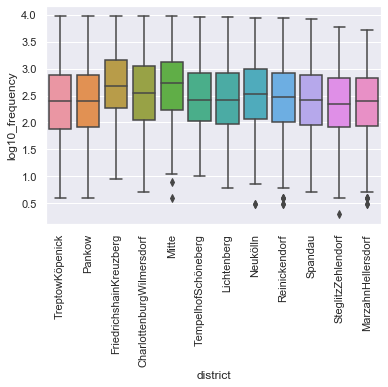

In [15]:
#6 Using Log10 to represent the crime frequencies in each district

    #creating a column with log10 transformation. 
cfreqout_wo_outliers1['log10_frequency'] = round(np.log10(cfreqout_wo_outliers1['frequency']),2)
cfreq.describe()
    
    #dropping rows where frequency is 0. 
cfreqout_wo_outliers1= cfreqout_wo_outliers1[cfreqout_wo_outliers1['frequency'] != 0]
cfreqout_wo_outliers1['frequency'].min()
cfreqout_wo_outliers1.describe()

# Plotting the result
sns.boxplot(x=cfreqout_wo_outliers1['district'],y=cfreqout_wo_outliers1['log10_frequency'])
plt.xticks(rotation=90)
plt.show()

Charlottenburg/Wilmersdorf, Friedrichshain/Kreuzberg and Mitte have the highest frequency of crime. 

,district,type,frequency
146,SteglitzZehlendorf,arson,17.15
162,TempelhofSchöneberg,arson,21.82
98,Pankow,arson,23.87
114,Reinickendorf,arson,24.18
50,MarzahnHellersdorf,arson,25.11
130,Spandau,arson,28.58
66,Mitte,arson,29.92
178,TreptowKöpenick,arson,32.29
18,FriedrichshainKreuzberg,arson,32.86
82,Neukölln,arson,34.51


<BarContainer object of 192 artists>

[Text(0, 0, 'SteglitzZehlendorf'),
 Text(0, 0, 'TempelhofSchöneberg'),
 Text(0, 0, 'Pankow'),
 Text(0, 0, 'Reinickendorf'),
 Text(0, 0, 'MarzahnHellersdorf'),
 Text(0, 0, 'Spandau'),
 Text(0, 0, 'Mitte'),
 Text(0, 0, 'TreptowKöpenick'),
 Text(0, 0, 'FriedrichshainKreuzberg'),
 Text(0, 0, 'Neukölln'),
 Text(0, 0, 'SteglitzZehlendorf'),
 Text(0, 0, 'Lichtenberg')]

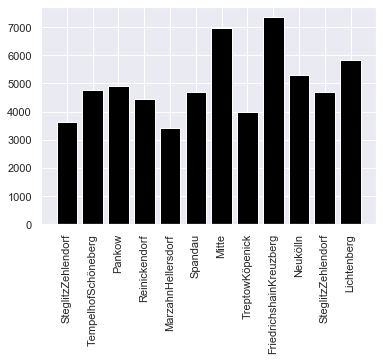

In [16]:
    #grouing per district to calculate the mean of mean of frequencies...

districts = cfreqout_wo_outliers1.groupby(['district','type'])['frequency'].mean().reset_index().sort_values('frequency')
pd.set_option('display.max_rows', None)
districts['frequency'] = round(districts['frequency'],2)
districts.head(20)

    #visualising average frequency of crime per district
fig, ax = plt.subplots()
ax.bar(districts['district'],districts['frequency'], color='black')
ax.set_xticklabels(districts['district'], rotation=90)

False

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

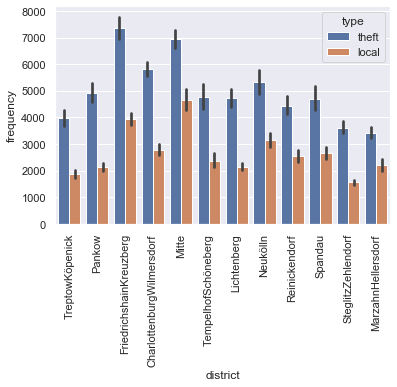

In [17]:
#7 spliting crimes in two groups: theft & crime_hood and others. 
    #creating group1 with other crimes
group1 = cfreqout_wo_outliers1[cfreqout_wo_outliers1['type']!= 'theft']
group1 = cfreqout_wo_outliers1[cfreqout_wo_outliers1['type']!= 'local']

    #creating group2 with the most common ones
lst = ['theft','local']
    #cfreq2.isin(lst)
group2= cfreqout_wo_outliers1[cfreqout_wo_outliers1.type.isin(lst)]

    #checking if it is correct
len(group2) + len(group1) == len(cfreqout_wo_outliers1)
    #plotting the difference between theft and local crime
sns.barplot(group2.district, group2.frequency, hue=group2.type)
plt.xticks(rotation=90)

It appears that the perpetrators living in Charlottenburg/Wilmersdorf, Neukolln, Friedrichshain and Mitte are more likely to commit the crime in their own districts than other perpetrators are.
Charlottenburg/Wilmersdorf and Mitte, followed by Friedrichshain/Kreuzberg have by far more thefts than others districts. 

In [18]:
#8 showing top three crimes (by their frequency in each district)

#districts[~districts.continent.isin(continents) & 
       #    gapminder.year.isin(years)]
districts = districts.sort_values(['frequency'], ascending=False)

#attempt = districts[(districts['district'].unique()) & districts['frequency'].sort_values(['frequency'], ascending=False).head(3)]
#attempt = districts[(districts['district'].unique()) & (districts['frequency'].head(3))]
#attempt = districts[(districts['district'].unique()) & (districts['frequency'].head())]

#npattempt = np.where((districts['district'].unique()) & (districts['frequency'].max()) )

#distlist = list(districts['district'].unique())
#vals = list(districts['frequency'])


In [19]:
# how to transpose only certain columns? 


In [20]:
cfreqout_wo_outliers1 = cfreqout_wo_outliers1.groupby(['district','type'])['frequency'].mean().reset_index().sort_values(['type','district','frequency'])
pd.set_option('display.max_rows', None)
cfreqout_wo_outliers1['frequency'] = round(cfreqout_wo_outliers1['frequency'],2)
cfreqout_wo_outliers1.head(20)
len(cfreqout_wo_outliers1)

,district,type,frequency
0,CharlottenburgWilmersdorf,accidental_fire,229.98
16,FriedrichshainKreuzberg,accidental_fire,94.81
32,Lichtenberg,accidental_fire,83.34
48,MarzahnHellersdorf,accidental_fire,76.06
64,Mitte,accidental_fire,80.16
80,Neukölln,accidental_fire,76.70
96,Pankow,accidental_fire,54.69
112,Reinickendorf,accidental_fire,61.43
128,Spandau,accidental_fire,69.86
144,SteglitzZehlendorf,accidental_fire,47.64


192

In [21]:
############################################################

In [22]:
# visualising the most common crime types

crimes = cfreqout_wo_outliers1.groupby('type')['frequency'].mean().reset_index().sort_values('frequency')
crimes

,type,frequency
2,arson,40.714167
0,accidental_fire,82.961667
12,street_robbery,86.612500
11,robbery,146.910833
5,car_theft,175.097500
10,property_damage_graffiti,261.605833
4,burglary,293.065000
1,agg_assault,304.638333
15,threat,403.591667
6,drugs,408.231667


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

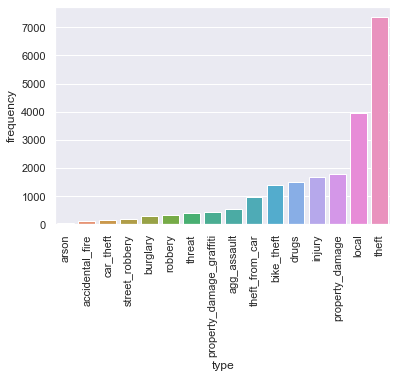

In [23]:
FridKreuz = cfreqout_wo_outliers1.loc[cfreqout_wo_outliers1['district']=='FriedrichshainKreuzberg'].sort_values('frequency')

sns.barplot(FridKreuz.type, FridKreuz.frequency)

plt.xticks(rotation=90)


In [24]:
# visualising average frequency of crime tipes
#fig, ax = plt.subplots(figsize = (30,6))
#x = cfreq_overview['type']
#y = cfreq_overview['frequency']
#ax.bar(x,y, color='black')


In [25]:
#creating subframe wiht relevant info for calculating averages and visualising the results
#cf1 = cfreq.drop(columns=['year','hood_id','neighborhood'])
#cf1.head()

In [26]:
#cfreqavg =  cf1.groupby('frequency').mean()
#cfreqavg =  cf1.groupby(['district','type']).agg({'frequency':'mean'}).reset_index()
#cfreqavg

In [27]:
#cfre = cf1.pivot_table(index=cf1.index, columns=[cf1['district'],cf1['type']], values='frequency')
#cfre


In [28]:
#fig, ax = plt.subplots()
#x = cfreqavg['type']
#y = cfreqavg['frequency']
#ax.bar(x,y)

In [29]:
#ploting 
#sns.relplot(x='CO2 Emission Grams/Mile', y='Highway MPG', hue="Fuel Type", size="Fuel Type", data=data)
#fig, ax = pyplot.subplots(figsize=(20,20))
#sns.scatterplot(x='district', y="robbery", hue="year", data=crime_freq)

In [30]:
# finding correlations
correlations = round(crime_freq.corr(),2)
correlations

,year,hood_id,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,crime_hood\t
year,1.00,0.00,-0.01,0.03,0.01,-0.00,0.02,-0.06,-0.06,-0.08,-0.01,-0.29,0.04,0.05,-0.05,0.04,0.07,-0.01
hood_id,0.00,1.00,-0.14,-0.11,-0.16,-0.19,-0.10,-0.28,-0.00,-0.08,-0.40,-0.18,-0.04,-0.04,-0.14,-0.16,-0.28,-0.19
robbery,-0.01,-0.14,1.00,0.96,0.76,0.67,0.80,0.45,0.45,0.31,0.31,0.18,0.81,0.81,0.59,0.67,0.36,0.81
street_robbery,0.03,-0.11,0.96,1.00,0.71,0.69,0.85,0.38,0.44,0.26,0.29,0.21,0.90,0.91,0.60,0.71,0.38,0.80
injury,0.01,-0.16,0.76,0.71,1.00,0.94,0.88,0.76,0.59,0.62,0.43,0.08,0.74,0.70,0.84,0.61,0.38,0.97
agg_assault,-0.00,-0.19,0.67,0.69,0.94,1.00,0.90,0.79,0.59,0.66,0.50,0.12,0.77,0.72,0.89,0.64,0.50,0.95
threat,0.02,-0.10,0.80,0.85,0.88,0.90,1.00,0.63,0.57,0.59,0.37,0.16,0.94,0.91,0.83,0.71,0.37,0.94
theft,-0.06,-0.28,0.45,0.38,0.76,0.79,0.63,1.00,0.46,0.78,0.72,0.15,0.43,0.38,0.79,0.51,0.40,0.76
car_theft,-0.06,-0.00,0.45,0.44,0.59,0.59,0.57,0.46,1.00,0.60,0.31,0.03,0.49,0.43,0.66,0.31,0.08,0.61
theft_from_car,-0.08,-0.08,0.31,0.26,0.62,0.66,0.59,0.78,0.60,1.00,0.47,0.03,0.41,0.33,0.77,0.28,0.18,0.62


In [31]:
#district_overview.loc[:,'Total'] = district_overview.sum(axis=1)
#district_overview.append(district_overview.sum().rename('AllCrimes')).assign(AllCrimes=lambda d: d.sum(1))
#do = district_overview.append(district_overview.sum().rename('AllCrimes')).assign(AllCrimes=lambda d: d.sum(1))
#do = do.reset_index(drop=True, inplace=True)
#district_overview.loc[district_overview['Robbery'] == district_overview['Robbery'].max()] 

In [32]:
#summarizing all crimes per district and year

#crime_freq.drop('hood_id', axis=1, inplace=True)
# setting year to index
#crime_freq = crime_freq.reset_index().set_index('year')

#dropping index column
#crime_freq = crime_freq.drop(columns = ['index'])

# assigning a total column 

#crime_freq['Total']= crime_freq.sum(axis=1)

#putting back year as a column
#crime_freq.reset_index(level=0, inplace=True)

crimef1 = pd.crosstab(index=[crime_freq['year'], crime_freq['hood_id'],crime_freq['neighborhood'],crime_freq['district']], 
                      columns=[crime_freq['robbery'], crime_freq['street_robbery'],crime_freq['injury'],
                               crime_freq['agg_assault'],crime_freq['threat'],crime_freq['theft'],crime_freq['car_theft'],
                               crime_freq['theft_from_car'],crime_freq['bike_theft'],crime_freq['burglary'],
                               crime_freq['accidental_fire'],crime_freq['arson'],crime_freq['property_damage'],
                               crime_freq['property_damage_graffiti'],crime_freq['drugs'],crime_freq['crime_hood']]
                      .reset_index(level=1).sort_index(ascending=False))


crimef1 = pd.crosstab(index=[crime_freq['year'], crime_freq['hood_id'],crime_freq['neighborhood'],crime_freq['district']], 
                      columns=[crime_freq['robbery'], crime_freq['street_robbery'],crime_freq['injury'],
                               crime_freq['agg_assault'],crime_freq['threat'],crime_freq['theft'],crime_freq['car_theft'],
                               crime_freq['theft_from_car'],crime_freq['bike_theft'],crime_freq['burglary'],
                               crime_freq['accidental_fire'],crime_freq['arson'],crime_freq['property_damage'],
                               crime_freq['property_damage_graffiti'],crime_freq['drugs'],crime_freq['crime_hood']]
                      )


crimef1 = pd.crosstab(index = crime_freq.index, columns=[crime_freq['robbery'], crime_freq['street_robbery'],crime_freq['injury'],
                               crime_freq['agg_assault'],crime_freq['threat'],crime_freq['theft'],crime_freq['car_theft'],
                               crime_freq['theft_from_car'],crime_freq['bike_theft'],crime_freq['burglary'],
                               crime_freq['accidental_fire'],crime_freq['arson'],crime_freq['property_damage'],
                               crime_freq['property_damage_graffiti'],crime_freq['drugs'],crime_freq['crime_hood']])

In [33]:
#cfreq_avg= cfreq.groupby(['year','district','type']).agg({'frequency':'mean'})
#cfreq_avg.head(5)
#cfreqavg =  cfreq[['year','district','type']].groupby('frequency').mean()
#cfreq_avg= cfreq.groupby(['year','district','type']).agg({'frequency':'mean'}).reset_index(level=0, inplace=True)
#cfreq_avg
#cfreq = cfreq.reset_index(drop=False, inplace=True)
#cfreq.reset_index(level=0, inplace=True)
#cfreq